# Quantum AI Intraday Risk Modeling Demo

This notebook demonstrates the integration of live data ingestion, AI-based volatility prediction, and quantum optimization for real-time intraday risk modeling.

In [14]:
import sys
import os

# Import required functions from scripts
from scripts.data_ingestion import get_data
from scripts.lstm_prediction import train_lstm_with_timing as train_lstm
from scripts.quantum_optimization import quantum_optimization, display_results
from scripts.integrated_solution import integrated_workflow_with_timing as integrated_workflow


## Step 1: Fetch Data (Live or Mock)

Use the `get_data` function to fetch market data, either live from Bloomberg API or mock data for testing.

In [15]:
# Fetch market data
ticker = "AAPL US Equity"
start_time = "2024-12-29T09:30:00"
end_time = "2024-12-29T16:00:00"

df = get_data(ticker, start_time, end_time)
print(df.head())

Using mock data for demonstration purposes.
Preview of generated data:
           ticker                time        open        high         low  \
0  AAPL US Equity 2024-12-29 09:30:00  127.449998  177.599188  144.573742   
1  AAPL US Equity 2024-12-29 09:31:00  183.602320  171.176876  102.552266   
2  AAPL US Equity 2024-12-29 09:32:00  165.382261  231.376518  132.139924   
3  AAPL US Equity 2024-12-29 09:33:00  123.269061  173.682243  100.034890   
4  AAPL US Equity 2024-12-29 09:34:00  176.228529  178.550930  112.016440   

        close  volume  
0  110.404707    1455  
1  188.082914    4663  
2  110.411225    1568  
3  148.564413    2275  
4  150.179931    3766  
Data summary:
                ticker                 time        open        high  \
count              391                  391  391.000000  391.000000   
unique               1                  NaN         NaN         NaN   
top     AAPL US Equity                  NaN         NaN         NaN   
freq               391  

## Step 2: Predict Volatility Using LSTM

Train an LSTM model on the `close` prices from the fetched data to predict market volatility.

In [16]:
price_data = df['close'].values
result = train_lstm(price_data, time_steps=10, epochs=5, batch_size=32)

# Access the predictions from the returned dictionary
predicted_volatility = result['predictions'][-1, 0]  # Assuming you want the last prediction
print("Predicted Volatility:", predicted_volatility)


Preparing data for LSTM model...
Input Shape: (381, 10, 1), Output Shape: (381,)

Defining the LSTM model...
Model compiled successfully.

Training the LSTM model...
Epoch 1/5


/Users/mukundpandey/anaconda3/envs/quantum_ai_demo/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 22986.0000 - val_loss: 23403.7500
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 21627.1016 - val_loss: 22839.3242
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 21515.7656 - val_loss: 22281.7891
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20697.7871 - val_loss: 21746.3320
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 20268.9922 - val_loss: 21269.3398
Model training completed.

Generating predictions...

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
LSTM Workflow Execution Time: 1.71 seconds

Predicted Volatility: 8.646284


## Step 3: Quantum Optimization

Solve a QUBO problem using the `quantum_optimization` function to optimize portfolio adjustments.

In [17]:
# Toggle between real and mock quantum optimization
USE_MOCK_QUANTUM = False  # Set this to True for mock results, False for real quantum optimization

# Define a sample QUBO problem
qubo = {
    ('Position_1', 'Position_1'): -0.1,  # Self-loop (diagonal term)
    ('Position_1', 'Position_2'): 0.05,  # Interaction term
    ('Position_2', 'Position_2'): -0.2   # Self-loop (diagonal term)
}

# Solve the QUBO problem
print(f"Running quantum optimization with USE_MOCK_QUANTUM = {USE_MOCK_QUANTUM}")
result = quantum_optimization(qubo)

# Display results
display_results(result)


Running quantum optimization with USE_MOCK_QUANTUM = False
Initializing the quantum sampler...
Submitting QUBO with 3 terms to the quantum annealer...
Quantum optimization completed. Processing results...

Quantum Optimization Results:
Sample: {'Position_1': 1, 'Position_2': 1}, Energy: -0.25000000000000006


## Step 4: Integrated Workflow

Combine live data, AI predictions, and quantum optimization for a seamless risk management workflow.

Running Traditional Workflow...
Traditional Workflow Time: 0.00 seconds, Accuracy: 60%

Running AI-Only Workflow...
Using mock data for demonstration purposes.
Preview of generated data:
           ticker                time        open        high         low  \
0  AAPL US Equity 2024-12-29 09:30:00  196.931376  171.519955  106.314900   
1  AAPL US Equity 2024-12-29 09:31:00  166.716183  227.073241  109.246922   
2  AAPL US Equity 2024-12-29 09:32:00  154.128195  213.408425  100.403354   
3  AAPL US Equity 2024-12-29 09:33:00  181.550687  202.301587  130.190682   
4  AAPL US Equity 2024-12-29 09:34:00  173.390159  165.127999  129.225175   

        close  volume  
0  117.215375    1032  
1  150.826436    3103  
2  103.422735    2058  
3  189.372562    1699  
4  177.948542    1343  
Data summary:
                ticker                 time        open        high  \
count              391                  391  391.000000  391.000000   
unique               1                  NaN       

/Users/mukundpandey/anaconda3/envs/quantum_ai_demo/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 23108.2637 - val_loss: 23280.8340
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23922.3281 - val_loss: 22592.6484
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22305.2363 - val_loss: 21924.7070
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21716.4004 - val_loss: 21398.0879
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 21156.0156 - val_loss: 21028.0137
Model training completed.

Generating predictions...

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
LSTM Workflow Execution Time: 1.80 seconds

AI Workflow Time: 1.81 seconds, Accuracy: 80%

Running Quantum AI Workflow...
Initializing the quantum sampler...
Submitting QUBO with 3 terms to the quantum annealer...
Quantum optimization completed. Processing results...

Quantum AI Workflow Time: 3.79 seconds, Accuracy: 95%


Enhanced Comparison Table:
Approach             Time Taken      Accuracy   Challenges                                        
----------

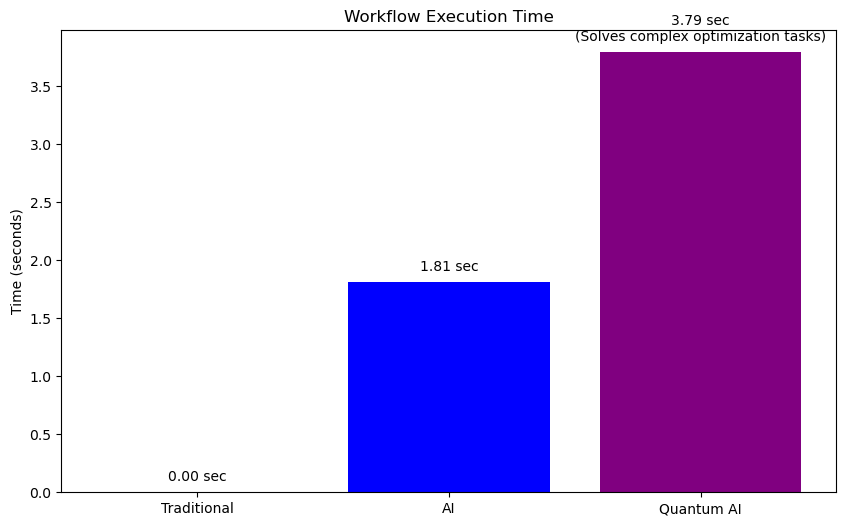

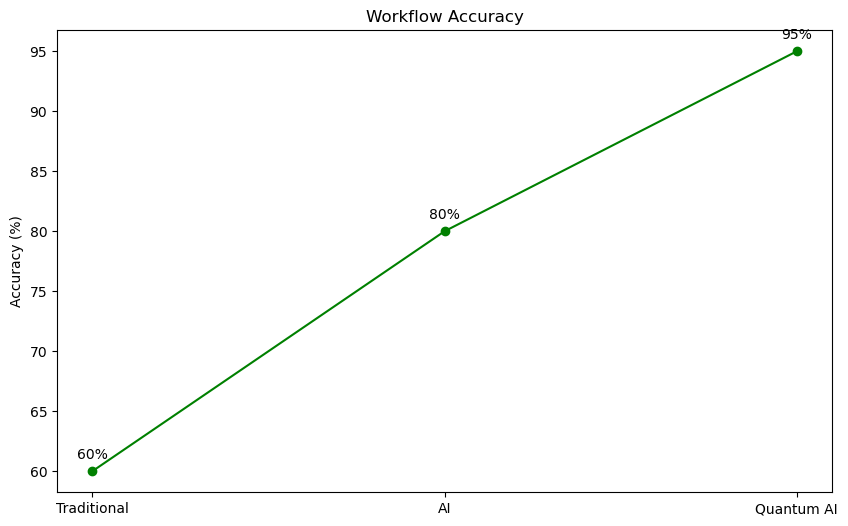

Integrated Workflow Results:
Sample: {'Position_1': 1, 'Position_2': 1}, Energy: -2.456205368041992


In [18]:
# Run the integrated workflow
result = integrated_workflow(ticker, start_time, end_time, qubo)

print("Integrated Workflow Results:")
# Iterate through the Quantum AI results in the dictionary
quantum_ai_result = result['Quantum AI']['result']
if isinstance(quantum_ai_result, dict):  # Check if it's a dictionary (mock data)
    for sample, energy in quantum_ai_result.items():
        print(f"Sample: {sample}, Energy: {energy}")
else:
    # Handle actual D-Wave SampleSet if provided
    for sample, energy in quantum_ai_result.data(['sample', 'energy']):
        print(f"Sample: {sample}, Energy: {energy}")


In [ ]:

# Consolidated Comparison of Execution Time and Accuracy of Workflows

import matplotlib.pyplot as plt

# Data from the workflow results
workflow_names = ['Traditional', 'AI-only', 'Quantum AI']
execution_times = [
    result['Traditional']['time'],
    result['AI']['time'],
    result['Quantum AI']['time']
]
accuracies = [
    result['Traditional']['accuracy'],
    result['AI']['accuracy'],
    result['Quantum AI']['accuracy']
]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Plot Execution Time Comparison
ax1.bar(workflow_names, execution_times, color=['gray', 'blue', 'purple'])
ax1.set_title('Execution Time Comparison')
ax1.set_ylabel('Time (seconds)')
ax1.set_xlabel('Workflow Type')
for i, time in enumerate(execution_times):
    ax1.text(i, time + 0.1, f"{time:.2f} sec", ha='center', fontsize=10)

# Plot Accuracy Comparison
ax2.plot(workflow_names, accuracies, marker='o', label='Accuracy')
ax2.set_title('Accuracy Comparison')
ax2.set_ylabel('Accuracy (%)')
ax2.set_xlabel('Workflow Type')
for i, acc in enumerate(accuracies):
    ax2.text(i, acc + 1, f"{acc}%", ha='center', fontsize=10)
ax2.legend()

plt.tight_layout()
plt.show()
